In [2]:
import torch
import torchvision
import torch.nn as nn

import numpy as np

import json
import requests
from PIL import Image
import io


HYPARAM 값 수정

In [1]:
hyparam_batchsize = 32
hyparam_lr = 0.001
num_classes = 4#단어, 뜻, 예문, 동의어

데이터 도입부

In [21]:
# Load the JSON file and extract the relevant information
with open('data/export-2023-03-24T15_46_56.209Z.json', encoding='utf8') as f:
    data = json.load(f)

image_paths = []
annotations = []
img_tensors = []
for obj in data:
    image_paths.append(obj["Labeled Data"])#이미지 링크
    annotations.append(obj["Label"]['objects'])#라벨링 정보
    
    #download img from web using link
    response = requests.get(obj["Labeled Data"])
    img_pil = Image.open(io.BytesIO(response.content))

    #이미지를 텐서로 변환
    img_tensor = torch.as_tensor(np.array(img_pil)).permute(2, 0, 1).float()

    #이미지 텐서를 리스트에 append
    img_tensors.append(img_tensor)


(선택) show image

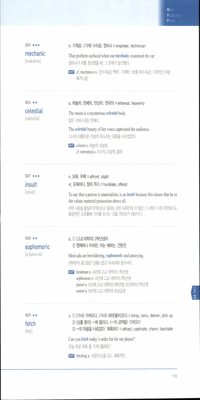

In [22]:
from IPython.display import display #이미지를 ipynb에 출력할 때 사용
display(img_pil.resize((200,400)))#마지막 img_pil 출력


In [23]:
# Define the PyTorch Dataset class
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, annotations):
        self.image_paths = image_paths
        self.annotations = annotations
        self.img_tensors = img_tensors
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Load the image and apply any necessary preprocessing
        #image = torchvision.io.read_image(self.image_paths[idx])
        image = self.img_tensors[idx]
        
        # Extract the bounding box coordinates and class labels for each object in the image
        bboxes = []
        labels = []
        for annotation in self.annotations[idx]:
            bboxes.append(annotation['bbox'])
            labels.append(annotation["value"])
        return image, bboxes, labels

In [27]:
dataset = MyDataset(image_paths, annotations)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=hyparam_batchsize, shuffle=True)


데이터셋 예시 프린트

In [28]:

print("image tensor: ",dataset[0][0])#image tensor: 이미지를 학습하기 위해 텐서로 변환됨
print("image bbox", dataset[0][1])#image bbox:라벨링한 좌표
print("image label",dataset[0][2])#image label:단어인지 뜻인지 등

image tensor:  tensor([[[25., 30., 23.,  ...,  9.,  8.,  6.],
         [22., 27., 21.,  ...,  1.,  2.,  2.],
         [20., 27., 22.,  ..., 10., 10., 10.],
         ...,
         [ 9., 12., 13.,  ...,  1.,  2.,  3.],
         [ 9., 12., 13.,  ...,  0.,  2.,  0.],
         [10., 12., 12.,  ...,  9., 10.,  8.]],

        [[31., 38., 29.,  ..., 18., 17., 16.],
         [28., 34., 27.,  ..., 10., 11., 12.],
         [26., 33., 27.,  ..., 19., 19., 20.],
         ...,
         [18., 17., 17.,  ...,  6.,  6.,  5.],
         [18., 17., 17.,  ...,  5.,  7.,  8.],
         [19., 17., 16.,  ..., 14., 17., 18.]],

        [[19., 27., 25.,  ..., 15., 16., 15.],
         [18., 27., 25.,  ...,  7., 10., 13.],
         [22., 31., 30.,  ..., 16., 18., 22.],
         ...,
         [15., 21., 26.,  ..., 12., 15., 18.],
         [17., 23., 26.,  ...,  8., 10., 10.],
         [18., 23., 27.,  ...,  8.,  9.,  7.]]])
image bbox [{'top': 504, 'left': 362, 'height': 75, 'width': 109}, {'top': 1179, 'left': 36

In [ ]:
model = #입력

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=hyparam_lr)